In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/home/project/imagerecognition', validation_size = 0)

Extracting /home/project/imagerecognition/train-images-idx3-ubyte.gz
Extracting /home/project/imagerecognition/train-labels-idx1-ubyte.gz
Extracting /home/project/imagerecognition/t10k-images-idx3-ubyte.gz
Extracting /home/project/imagerecognition/t10k-labels-idx1-ubyte.gz


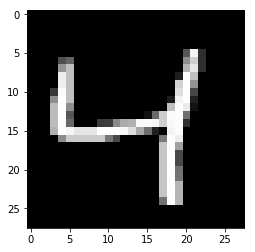

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap = 'Greys_r')

In [4]:
inputs = tf.placeholder(tf.float32, (None, 28, 28, 1))

def convolutionize(x, conv_w, h = 1):
    return tf.nn.conv2d(input = x, filter = conv_w, strides = [1, h, h, 1], padding = 'SAME')

def pooling(wx):
    return tf.nn.max_pool(wx, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')

w1 = tf.Variable(tf.random_normal([3, 3, 1, 16], stddev = 0.5))
b1 = tf.Variable(tf.zeros(shape = [16]))
w2 = tf.Variable(tf.random_normal([3, 3, 16, 8], stddev = 0.5))
b2 = tf.Variable(tf.zeros(shape = [8]))
w3 = tf.Variable(tf.random_normal([3, 3, 8, 8], stddev = 0.5))
b3 = tf.Variable(tf.zeros(shape = [8]))

conv1 = pooling(tf.nn.relu(convolutionize(inputs, w1) + b1))
conv2 = pooling(tf.nn.relu(convolutionize(conv1, w2) + b2))
encoded = pooling(tf.nn.relu(convolutionize(conv2, w3) + b3))

encoded = tf.image.resize_nearest_neighbor(encoded, (7,7))

w4 = tf.Variable(tf.random_normal([3, 3, int(encoded.shape[3]), 8], stddev = 0.5))
b4 = tf.Variable(tf.zeros(shape = [8]))

conv3 = tf.nn.relu(convolutionize(encoded, w4) + b4)
conv3 = tf.image.resize_nearest_neighbor(encoded, (14, 14))

w5 = tf.Variable(tf.random_normal([3, 3, int(conv3.shape[3]), 8], stddev = 0.5))
b5 = tf.Variable(tf.zeros(shape = [8]))

conv4 = tf.nn.relu(convolutionize(conv3, w5) + b5)
conv4 = tf.image.resize_nearest_neighbor(encoded, (28, 28))

w6 = tf.Variable(tf.random_normal([3, 3, int(conv4.shape[3]), 16], stddev = 0.5))
b6 = tf.Variable(tf.zeros(shape = [16]))

conv5 = tf.nn.relu(convolutionize(conv4, w6) + b6)

w7 = tf.Variable(tf.random_normal([3, 3, int(conv5.shape[3]), 1], stddev = 0.5))
b7 = tf.Variable(tf.zeros(shape = [1]))

logits = convolutionize(conv5, w7) + b7
decoded = tf.nn.sigmoid(logits)

loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = inputs, logits = logits))
opt = tf.train.AdamOptimizer(0.01).minimize(loss)

In [5]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

EPOCH = 20
BATCH_SIZE = 200
for i in xrange(EPOCH):
    TOTAL_LOST = 0
    for k in xrange(mnist.train.num_examples // BATCH_SIZE):
        batch = mnist.train.next_batch(BATCH_SIZE)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([loss, opt], feed_dict = {inputs: imgs})
        TOTAL_LOST += batch_cost
    
    print 'Epoch:' + str(i + 1) + ', loss: ' + str(TOTAL_LOST / (mnist.train.num_examples // BATCH_SIZE) * 1.0)

Epoch:1, loss: 0.944287206829
Epoch:2, loss: 0.256071705619
Epoch:3, loss: 0.231479127258
Epoch:4, loss: 0.216903027793
Epoch:5, loss: 0.209671331644
Epoch:6, loss: 0.204414404581
Epoch:7, loss: 0.200140404006
Epoch:8, loss: 0.196449869921
Epoch:9, loss: 0.193713940581
Epoch:10, loss: 0.191717518369
Epoch:11, loss: 0.189723909448
Epoch:12, loss: 0.187901881387
Epoch:13, loss: 0.185702747802
Epoch:14, loss: 0.183840585401
Epoch:15, loss: 0.1824847202
Epoch:16, loss: 0.181424424301
Epoch:17, loss: 0.180779701918
Epoch:18, loss: 0.1802581653
Epoch:19, loss: 0.179296328177
Epoch:20, loss: 0.178475355903


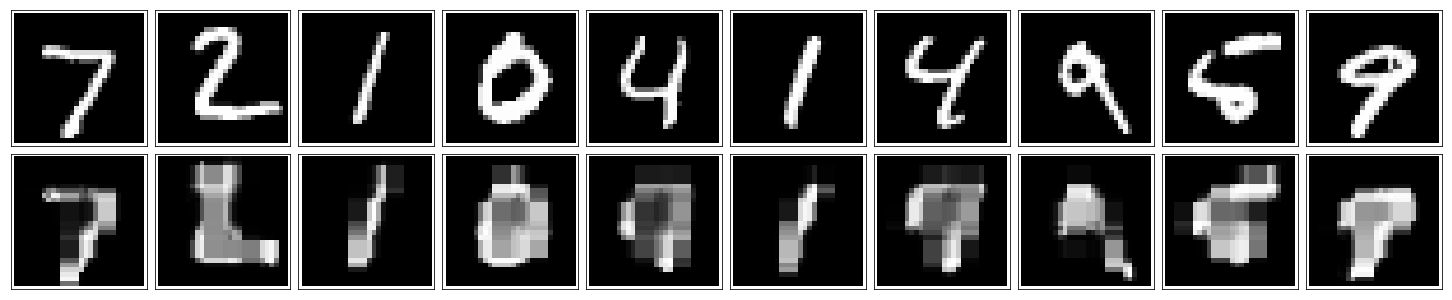

In [6]:
fig, axes = plt.subplots(nrows = 2, ncols = 10, sharex = True, sharey = True, figsize = (20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict={inputs: in_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap = 'Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad = 0.1)

In [7]:
tf.reset_default_graph()
inputs = tf.placeholder(tf.float32, (None, 28, 28, 1))

conv1 = tf.layers.conv2d(inputs, 16, (3, 3), padding = 'same', activation = tf.nn.relu)
maxpool1 = tf.layers.max_pooling2d(conv1, (2, 2), (2, 2), padding = 'same')
conv2 = tf.layers.conv2d(maxpool1, 8, (3, 3), padding = 'same', activation = tf.nn.relu)
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2, 2), padding = 'same')
conv3 = tf.layers.conv2d(maxpool2, 8, (3, 3), padding = 'same', activation = tf.nn.relu)
encoded = tf.layers.max_pooling2d(conv3, (2, 2), (2, 2), padding = 'same')

upsample1 = tf.image.resize_nearest_neighbor(encoded, (7, 7))

conv4 = tf.layers.conv2d(upsample1, 8, (3, 3), padding = 'same', activation = tf.nn.relu)
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14, 14))
conv5 = tf.layers.conv2d(upsample2, 8, (3, 3), padding = 'same', activation = tf.nn.relu)
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28, 28))
conv6 = tf.layers.conv2d(upsample3, 16, (3, 3), padding = 'same', activation = tf.nn.relu)

logits = tf.layers.conv2d(conv6, 1, (3, 3), padding = 'same', activation = None)
decoded = tf.nn.sigmoid(logits, name='decoded')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = inputs, logits = logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [8]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

EPOCH = 20
BATCH_SIZE = 200
for i in xrange(EPOCH):
    TOTAL_LOST = 0
    for k in xrange(mnist.train.num_examples // BATCH_SIZE):
        batch = mnist.train.next_batch(BATCH_SIZE)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([cost, opt], feed_dict = {inputs: imgs})
        TOTAL_LOST += batch_cost
    
    print 'Epoch:' + str(i + 1) + ', loss: ' + str(TOTAL_LOST / (mnist.train.num_examples // BATCH_SIZE) * 1.0)

Epoch:1, loss: 0.232885390272
Epoch:2, loss: 0.141064813832
Epoch:3, loss: 0.126160111825
Epoch:4, loss: 0.118467650985
Epoch:5, loss: 0.113979848077
Epoch:6, loss: 0.110846565093
Epoch:7, loss: 0.108360815619
Epoch:8, loss: 0.106341208791
Epoch:9, loss: 0.104733094151
Epoch:10, loss: 0.10316217117
Epoch:11, loss: 0.101932368452
Epoch:12, loss: 0.100871126925
Epoch:13, loss: 0.099986186251
Epoch:14, loss: 0.0991120377183
Epoch:15, loss: 0.098448495989
Epoch:16, loss: 0.0977650545786
Epoch:17, loss: 0.0972333544244
Epoch:18, loss: 0.0966798994442
Epoch:19, loss: 0.0962372431904
Epoch:20, loss: 0.0958718087276


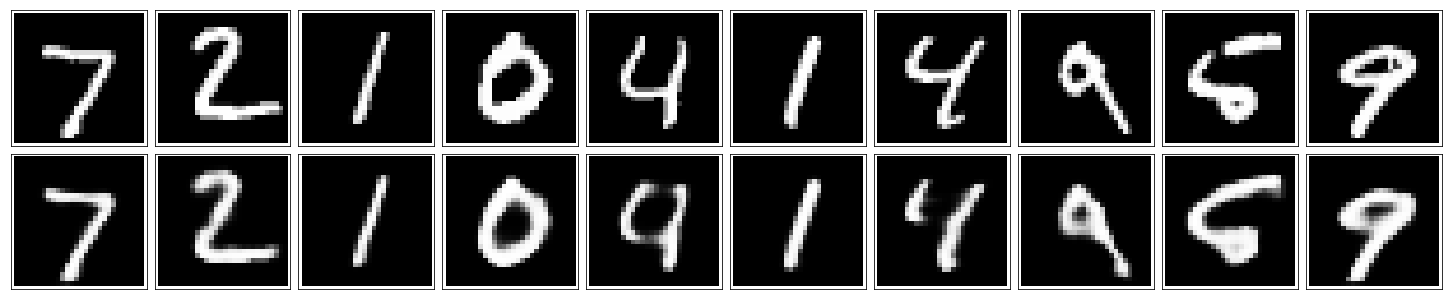

In [9]:
fig, axes = plt.subplots(nrows = 2, ncols = 10, sharex = True, sharey = True, figsize = (20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict={inputs: in_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap = 'Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad = 0.1)